# Python DL_NLP Crash Course  Part 3_Word Embeding with Word2Vec & GloVe

## Full Day Workshop for user learn Data Science with Python
### 2017 Dec Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


## The Word Embedding Model
### Recently, the field of natural language processing has been moving away from bag-of-word models and word encoding toward word embeddings. The benet of word embeddings is that they encode each word into a dense vector that captures something about its relative meaning within the training text. This means that variations of words like case, spelling, punctuation, and so on will automatically be learned to be similar in the embedding space.

Word embedding is an approach to provide a ** dense vector representation ** of words that capture
something about their meaning. 

Word embeddings are an improvement over simpler bag-of-word
model word encoding schemes like word counts and frequencies that result in ** large and sparse
vectors (mostly 0 values) ** that describe documents but not the meaning of the words.


Word embeddings work by using an algorithm to train a set of ** fixed-length dense ** and
** continuous-valued vectors ** based on a large corpus of text. Each word is represented by a
point in the embedding space and these points are learned and moved around based on the
words that surround the target word. 

It is defining a word by the company that it keeps that
allows the word embedding to learn something about the meaning of words. The vector space
representation of the words provides a projection where words with similar meanings are locally
clustered within the space.

The use of word embeddings over other text representations is one of the key methods that
has led to breakthrough performance with deep neural networks on problems like machine
translation.


Two approaches in this notebook: 
 
$$ Word2Vec $$ 

By Google Researchers 

$$ GloVe $$

By Standford

## Gensim
Gensim is an open source Python library for natural language processing, with a focus on topic
modeling. It is billed as \topic modeling for humans". Gensim was developed and is maintained
by the Czech natural language processing researcher Radim Rehurek. Most notably for this tutorial, it supports an implementation of the Word2Vec word embedding
for learning new word vectors from text.

In [3]:
import gensim

## Word2Vec

Word2Vec is one algorithm for learning a word embedding from a text corpus. There are two
main training algorithms that can be used to learn the embedding from text; they are 

$$ Continuous-Bag-of-Words(CBOW) $$

$$ Skip grams $$

We will not get into the algorithms other than to say
that they generally look at a window of words for each target word to provide context and in
turn meaning for words. The approach was developed by Tomas Mikolov, formerly at Google
and currently at Facebook.

Word2Vec models require a lot of text, e.g. the entire Wikipedia corpus. Nevertheless, we
will demonstrate the principles using a small in-memory example of text. Gensim provides the
Word2Vec class for working with a Word2Vec model. Learning a word embedding from text
involves loading and organizing the text into sentences and providing them to the constructor
of a new Word2Vec() instance. For example:

In [8]:
#Specifically, each sentence must be tokenized, meaning divided into words and prepared (e.g.
#perhaps pre-filtered and perhaps converted to a preferred case).

sentences = '...'
model = Word2Vec(sentences)

NameError: name 'Word2Vec' is not defined

There are many parameters on this constructor; a few noteworthy arguments you may
wish to congure are:
 

- ** size **: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).

- **window**: (default 5) The maximum distance between a target word and words around the target word.

- **min count**: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- **workers**: (default 3) The number of threads to use while training.

- **sg**: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

### TIPS: 
The defaults are often good enough when just getting started. If you have a lot of cores, as
most modern computers do, I strongly encourage you to increase workers to match the number
of cores (e.g. 8). After the model is trained, it is accessible via the 

$$ wv $$

attribute. This is the
actual word vector model in which queries can be made. For example, you can print the learned
vocabulary of tokens (words) as follows:

In [10]:
words = list(model.wv.vocab)
print(words)

#You can review the embedded vector for a specific token as follows:

print(model['word'])

#Finally, a trained model can then be saved to file by calling the save word2vec format()
#function on the word vector model. By default, the model is saved in a binary format to save space. For example:
model.wv.save_word2vec_format('model.bin')

#When getting started, you can save the learned model in ASCII format and review the contents. You can do this by setting binary=False
#For Examples:

model.wv.save_word2vec_format('model.txt', binary=False)

# The saved model can then be loaded again by calling the Word2Vec.load() function. For example:
model = Word2Vec.load('model.bin')

NameError: name 'model' is not defined

We can tie all of this together with a worked example. Rather than loading a large text
document or corpus from le, we will work with a small, in-memory list of pre-tokenized
sentences.

In [16]:
from gensim.models import Word2Vec

#defining data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences, min_count=1)

print (model)

# summarize vocabulary
words = list(model.wv.vocab)
print(words)



Word2Vec(vocab=14, size=100, alpha=0.025)
['and', 'word2vec', 'for', 'sentence', 'this', 'is', 'one', 'second', 'another', 'the', 'first', 'yet', 'final', 'more']


In [17]:
# access vector for one word
print(model['sentence'])

[  1.09108200e-03  -1.50774524e-03  -3.20697599e-03  -9.94841801e-04
   3.15078214e-04   4.37214086e-03  -3.69665888e-03  -3.33983405e-03
  -4.54258965e-03   9.99633805e-04  -4.23612585e-03  -3.83223081e-03
   4.32860339e-03  -3.25149111e-03   2.95695267e-03  -3.71881900e-03
  -1.00519822e-03   4.84643737e-03  -3.53238801e-03   1.22420708e-04
  -4.58742678e-03   3.71732470e-03  -4.15829709e-03  -3.93305486e-03
  -8.70488118e-04  -4.59041959e-03   3.76840495e-03  -3.98694444e-03
   1.56842021e-03   4.36723279e-03   1.75691827e-03   1.42543553e-03
  -3.02267703e-03   1.56308757e-03   1.13664242e-03  -1.06631417e-03
   4.95949062e-03   1.51077483e-03  -3.55202728e-03  -1.73709460e-03
  -4.47266269e-03  -3.67703475e-03   3.55967181e-03  -7.38290721e-04
   7.48101273e-04   2.56760861e-03   8.07312434e-04  -2.70612515e-03
  -4.23209416e-03   3.43392487e-03   9.29186004e-04   4.30594292e-03
  -1.68683392e-03   2.32448475e-03  -3.98656679e-03   4.22142725e-03
   3.05290613e-03   2.75243446e-03

/Applications/DataScienceStudio.app/Contents/Resources/kit/python.packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [18]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


## Word Embedded Visualiazation

After you learn word embedding for your text data, it can be nice to explore it with visualization.
You can use classical projection methods to reduce the high-dimensional word vectors to two-
dimensional plots and plot them on a graph.

In [19]:
#We can retrieve all of the vectors from a trained model as follows
X = model[model.wv.vocab]

/Applications/DataScienceStudio.app/Contents/Resources/kit/python.packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [20]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [21]:
#create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class
pca = PCA(n_components=2)
result = pca.fit_transform(X)


In [22]:
#resulting projection can be plotted using Matplotlib as follows,
pyplot.scatter(result[:, 0], result[:, 1])

In [24]:
#one step further and annotate the points on the graph with the words themselves.
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

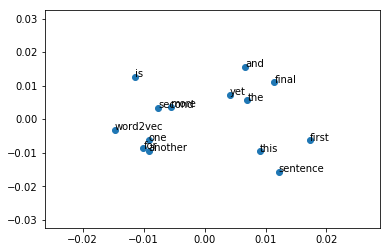

In [25]:
pyplot.show()

# Load Other Word Embedding for QuickStart
Training your own word vectors may be the best approach for a given NLP problem. But it
can take a long time, a fast computer with a lot of RAM and disk space, and perhaps some
expertise in nessing the input data and training algorithm. An alternative is to simply use an
existing pre-trained word embedding. 

A pre-trained model is nothing more than ** a file containing tokens and their associated word
vectors. **

## Google Word2Vec

Google Word2Vec model was trained on Google news data (about 100
billion words); it contains 3 million words and phrases and was t using 300-dimensional word
vectors. It is a 1.53 Gigabyte le. You can download it from here:GoogleNews-vectors-negative300.bin.gz.
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing



In [28]:
# little linear algebra arithmetic with words. For example, 
#a popular example described in lectures and introduction papers is:
queen = (king - man) + woman

NameError: name 'king' is not defined

Running the example loads the Google pre-trained Word2Vec model and then calculates the
(king - man) + woman = ? operation on the word vectors for those words. The answer, as we
would expect, is queen.

In [ ]:
from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)


## Standford GloVe
Stanford researchers also have their own word embedding algorithm like Word2Vec called Global
Vectors for Word Representation, or GloVe for short.but generally, NLP practitioners seem to prefer GloVe at
the moment based on results.

Like Word2Vec, the GloVe researchers also provide pre-trained word vectors, in this case, a
great selection to choose from.

In [26]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.txt'
word2vec_output_file = 'word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

IOError: [Errno 2] No such file or directory: 'glove.txt'

# Learn and Load Word Embeddings in Kera

- About word embeddings and that Keras supports word embeddings via the Embedding layer.
- How to learn a word embedding while tting a neural network.
- How to use a pre-trained word embedding in a neural network.

## Keras Embedding Layer
Keras offrs an Embedding layer that can be used for neural networks on text data. It requires
that the input data be integer encoded, so that each word is represented by a unique integer.

This data preparation step can be performed using the ** Tokenizer API ** also provided with Keras.

The Embedding layer is initialized with random weights and will learn an embedding for all
of the words in the training dataset. 

It is a flexible layer that can be used in a variety of ways, such as:
 
- It can be used alone to learn a word embedding that can be saved and used in another model later.
- It can be used as part of a deep learning model where the embedding is learned along with the model itself.
- It can be used to load a pre-trained word embedding model, a type of transfer learning.

## Embedding Layer in Hidden
The Embedding layer is dened as the rst hidden layer of a network. It must specify 3 arguments:

** Input dim:**

This is the size of the vocabulary in the text data. For example, if your data
is integer encoded to values between 0-10, then the size of the vocabulary would be 11
words.

** Output dim:** 

This is the size of the vector space in which words will be embedded. It
denes the size of the output vectors from this layer for each word. For example, it could
be 32 or 100 or even larger. Test dierent values for your problem.

** input length: **

This is the length of input sequences, as you would dene for any input
layer of a Keras model. For example, if all of your input documents are comprised of 1000
words, this would be 1000.

In [ ]:
e = Embedding(200, 32, input_length=50)

For example, Above we dene an Embedding layer with a vocabulary of 200 (e.g. integer
encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be
embedded, and input documents that have 50 words each.

## Connect to Dense Layer after Embedding
### From 2D with weight to 1D array
The Embedding layer has weights that are learned. If you save your model to le, this will
include weights for the Embedding layer. The output of the Embedding layer is a 2D vector with
one embedding for each word in the input sequence of words (input document). If you wish
to connect a Dense layer directly to an Embedding layer, you must rst 
atten the 2D output
matrix to a 1D vector using the

$$ Flatten-layer $$

# Simple Project
In this section, we will look at how we can learn a word embedding while tting a neural
network on a text classication problem. We will dene a small problem where we have 10
text documents, each with a comment about a piece of work a student submitted. Each text
document is classied as positive 1 or negative 0. This is a simple sentiment analysis problem.
First, we will dene the documents and their class labels.

In [32]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [29]:
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]

Next, we can ** integer encode ** each document. 

This means that as input the Embedding layer will have sequences of integers. 

We could experiment with other more sophisticated bag of word model encoding like counts or ** TF-IDF **. 

Keras provides the ** one hot()** function that creates a hash of each word as an effcient integer encoding. 

We will estimate the ** vocabulary size ** of 50, which is much larger than needed to reduce the probability of collisions from the hash function.

In [33]:
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[25, 48], [18, 22], [39, 3], [17, 22], [28], [37], [3, 3], [40, 18], [3, 22], [40, 19, 48, 4]]


### Sequence Length with Paddling

The sequences have dierent lengths and Keras prefers inputs to be vectorized and all inputs
to have the same length. We will pad all input sequences to have the length of 4. Again, we can
do this with a built in Keras function, in this case the pad sequences() function.

In [34]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[25 48  0  0]
 [18 22  0  0]
 [39  3  0  0]
 [17 22  0  0]
 [28  0  0  0]
 [37  0  0  0]
 [ 3  3  0  0]
 [40 18  0  0]
 [ 3 22  0  0]
 [40 19 48  4]]


## Put in Part of Neural Netork Model

We are now ready to dene our Embedding layer as part of our neural network model.
The Embedding layer has a vocabulary of 50 and an input length of 4. 

We will choose a small embedding space of ** 8 dimensions. ** The model is a simple binary classication model.


Importantly, the output from the Embedding layer will be 4 vectors of 8 dimensions each, one for each word. We  flatten this to a one 32-element vector to pass on to the Dense output layer.

$$ 4 * 8 = 32 $$

In [35]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [39]:
# fit the model
model.fit(padded_docs, labels, epochs=40, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


You could save the learned weights from the Embedding layer to le for later use in other
models. You could also use this model generally to classify other documents that have the
same kind vocabulary seen in the test dataset.

## Reuse Pre-trained GloVe Embedding

It is common in the field of Natural Language Processing to learn, save, and make freely available word
embeddings. For example, the researchers behind GloVe method provide a suite of pre-trained
word embeddings on their website released under a public domain license.

## Download 800 MB file then run the sample


This example is inspired by an example in the Keras project: pretrained word embeddings.py.
After downloading and unzipping, you will see a few les, one of which is glove.6B.100d.txt,
which contains a 100-dimensional version of the embedding. If you peek inside the le, you will
see a token (word) followed by the weights (100 numbers) on each line. For example, below are
the rst line of the embedding ASCII text le showing the embedding for the.

In [42]:
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer


In [43]:
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


## Load the pre-trained GloVe data 

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt')
    for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Next, we need to create a matrix of one embedding for each word in the training
dataset. We can do that by ** enumerating all unique words in the Tokenizer.word index **

Locating the embedding weight vector from the loaded GloVe embedding. The result is a matrix
of weights only for words we will see during training.

In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
embedding_vector = embeddings_index.get(word)
if embedding_vector is not None:
embedding_matrix[i] = embedding_vector

Now we can define our model, fit, and evaluate it as before. 

The key difference is that the Embedding layer can be seeded with the GloVe word embedding weights.

** We chose the 100-dimensional version, therefore the Embedding layer must be defied with output dim set to 100 **

Finally, we do not want to update the learned word weights in this model, therefore we  will set the trainable attribute for the model to be False.

In [ ]:
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)

## General Tips

By experience it is usually good to disconnect (or remove) punctuation from
words, and sometimes also convert all characters to lowercase. One can also replace
all numbers (possibly greater than some constant) with some single token such as .
All these pre-processing steps aim to reduce the vocabulary size without removing
any important content (which in some cases may not be true when you lowercase
certain words, ie. `Bush' is dierent than `bush', while `Another' has usually the
same sense as `another'). The smaller the vocabulary is, the lower is the memory
complexity, and the more robustly are the parameters for the words estimated. You
also have to pre-process the test data in the same way.